   Height  Weight  Label
0     174      70      0
1     168      73      1
2     176      81      1
3     185      80      0
4     167      44      0


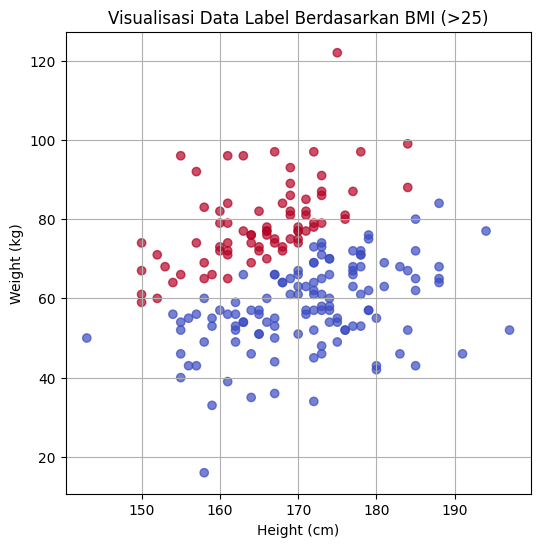

Akurasi: 0.97
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.93      1.00      0.96        13

    accuracy                           0.97        40
   macro avg       0.96      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



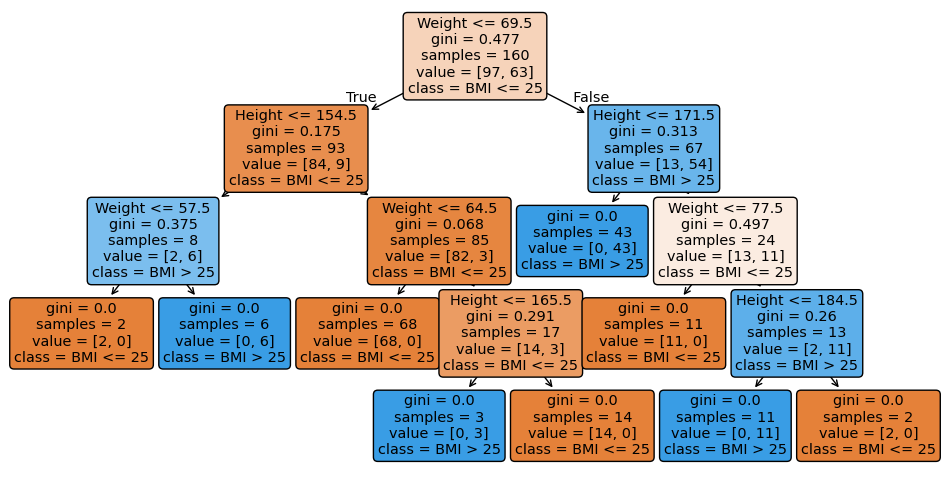

Model berhasil disimpan sebagai 'decision_tree_bmi_model.pkl'


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import pickle
import os

# Pastikan folder models ada
os.makedirs("models", exist_ok=True)

# Buat dataset sintetis yang lebih besar (200 data)
np.random.seed(42)
height = np.random.normal(loc=170, scale=10, size=200).astype(int)  # Tinggi rata-rata 170 cm
weight = np.random.normal(loc=65, scale=15, size=200).astype(int)   # Berat rata-rata 65 kg

# Label: 1 jika BMI > 25, 0 jika <= 25
# BMI = weight (kg) / (height (m))^2
bmi = weight / ((height / 100) ** 2)
label = (bmi > 25).astype(int)

# Buat DataFrame
df = pd.DataFrame({
    "Height": height,
    "Weight": weight,
    "Label": label
})
print(df.head())

# Visualisasi distribusi data
plt.figure(figsize=(6, 6))
plt.scatter(df["Height"], df["Weight"], c=df["Label"], cmap="coolwarm", alpha=0.7)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Visualisasi Data Label Berdasarkan BMI (>25)")
plt.grid(True)
plt.show()

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(
    df[["Height", "Weight"]], df["Label"], test_size=0.2, random_state=42
)

# Buat model Decision Tree
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, Y_train)

# Evaluasi model
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Akurasi: {accuracy:.2f}")
print(classification_report(Y_test, Y_pred))

# Visualisasi pohon keputusan
plt.figure(figsize=(12, 6))
plot_tree(
    model,
    feature_names=["Height", "Weight"],
    class_names=["BMI <= 25", "BMI > 25"],
    filled=True,
    rounded=True
)
plt.show()

# Simpan model
with open("models/decision_tree_bmi_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model berhasil disimpan sebagai 'decision_tree_bmi_model.pkl'")
